# Capstone Project - Car Accident Severity
*Applied Data Science Capstone by IBM/Coursera*
## What's Included in This Report
* [Car Accidents: A Brief Background](#intro)
* [About the Dataset](#data)
* [Methodology](#methodology)
* [Analysis]()
* [Results and Discussion]()
* [Key Findings and Conclusion]()

## Car Accidents: A Brief Background<a name="intro"></a>
A number of factors contribute to the risk of collisions, in the majority of the cases is related to driver factors, road and weather conditions. Traffic collisions often result in injury, disability, death, property damage, financial costs as well as terrible traffic jams. 

In an effort to avoid and reduce the frequency of these type of accidents, I will build a model to try predict the severity of an accident given the weather and the road conditions. This way we would be able to bring awareness to the drivers and warn people about the possibility of getting into a car accident and its severity if it happens. Then, people would drive more carefully or even change the travel/route if able to. 

The big question to be answered is: **Knowing the weather and road conditions, how severe would be the accident if it happens?**

## About the Dataset<a name="data"></a>
The raw data we will use is provided by the SDOT Traffic Management Division and includes data of all types of collisions that happened in Seattle city from 2004 to May/2020.

The data contains 194,673 samples and have 38 features that covers the weather and road conditions, collision factors and fatality.

Let's have a look on the data and understand better how to find the answer to the project problem.

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import folium

#load dataset and read it into a pandas dataframe
path = "./Data-Collisions.csv"
df = pd.read_csv(path)

C:\Users\juinj\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\juinj\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
print('[Dataset entries]')
print('Samples:', df.shape[0])
print('Features:', df.shape[1])

[Dataset entries]
Samples: 194673
Features: 38


In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [5]:
df.describe(include="all")

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,191996,84811,5638,194673.000000,194673,189769,194673.000000,194673.000000,194673.000000,194673.000000,194673,194673,188344,194673.000000,194673,29805,189789,189592,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,24102,2,1,NaN,2,10,NaN,NaN,NaN,NaN,5985,162058,7,NaN,39,1,4,11,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1782439,Matched,Block,NaN,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,,"Not Enough Information, or Insufficient Locati...",NaN,Property Damage Only Collision,Parked Car,NaN,NaN,NaN,NaN,2006/11/02 00:00:00+00,11/2/2006,Mid-Block (not related to intersection),NaN,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Y,N,Clear,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,276,79173,5638,NaN,136485,47987,NaN,NaN,NaN,NaN,96,96,89800,NaN,85209,29805,100274,111135,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,NaN,NaN,NaN,1.298901,NaN,NaN,2.444427,0.037139,0.028391,1.920780,NaN,NaN,NaN,13.867768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,NaN,NaN,NaN,0.457778,NaN,NaN,1.345929,0.198150,0.167413,0.631047,NaN,NaN,NaN,6.868755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,NaN,NaN,NaN,2.000000,NaN,NaN,3.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


#### We have missing values. How many?

In [6]:
df.isna().sum().to_frame().rename(columns={0: 'NaN Count'})

,NaN Count
SEVERITYCODE,0
X,5334
Y,5334
OBJECTID,0
INCKEY,0
COLDETKEY,0
REPORTNO,0
STATUS,0
ADDRTYPE,1926
INTKEY,129603


Some features have over 40% of missing data and for that reason I'll not consider them on my model.

After thoughtfully examining the dataset and removing the irrelevant data attributes away, I can say the variables I will possibly use to classify the severity of the accidents are:
- COLLISIONTYPE: Collision type
- WEATHER: Weather conditions during the time of the collision.
- ROADCOND: The condition of the road during the collision.
- LIGHTCOND: The light conditions during the collision.
- UNDERINFL: Whether or not a driver involved was under the influence of drugs or alcohol.
- JUNCTIONTYPE: Category of junction at which collision took place
- ADDRTYPE: Collision address type (Alley/Block/Intersection)
- HITPARKEDCAR: Whether or not the collision involved hitting a parked car. (Y/N)

These features contain missing values, but its below 3% of the total amount of samples.

#### What is our target variable?
Our target variable is the feature SEVERITYCODE that corresponds to the severity of the collision:
- 1: Property Damage only collision which is the same as Not injured coliision
- 2: Injury collision

By looking to the target variable I know it's a binary classification problem. 

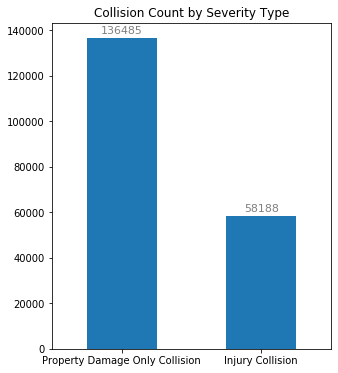

In [7]:
plt.figure(figsize=[5, 6])
splot = df['SEVERITYDESC'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Collision Count by Severity Type')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2., p.get_height()),
                   ha='center', va='center', fontsize=11, color='gray', xytext=(0, 8),
                   textcoords='offset points')

The model might suffer from bias when training. The target data have a proportion of 70:30 it will be interesting to experiment undersampling the majority class or train longer to reevaluate.

In [8]:
print('Skewness:', df['SEVERITYCODE'].skew())

Skewness: 0.8785961408527936


#### Where did these accidents happen?
From  the scatter plot below we can reasonably visualize concentration in the Central Area and some specific roads around the city, but there were incidents spread around the whole city.


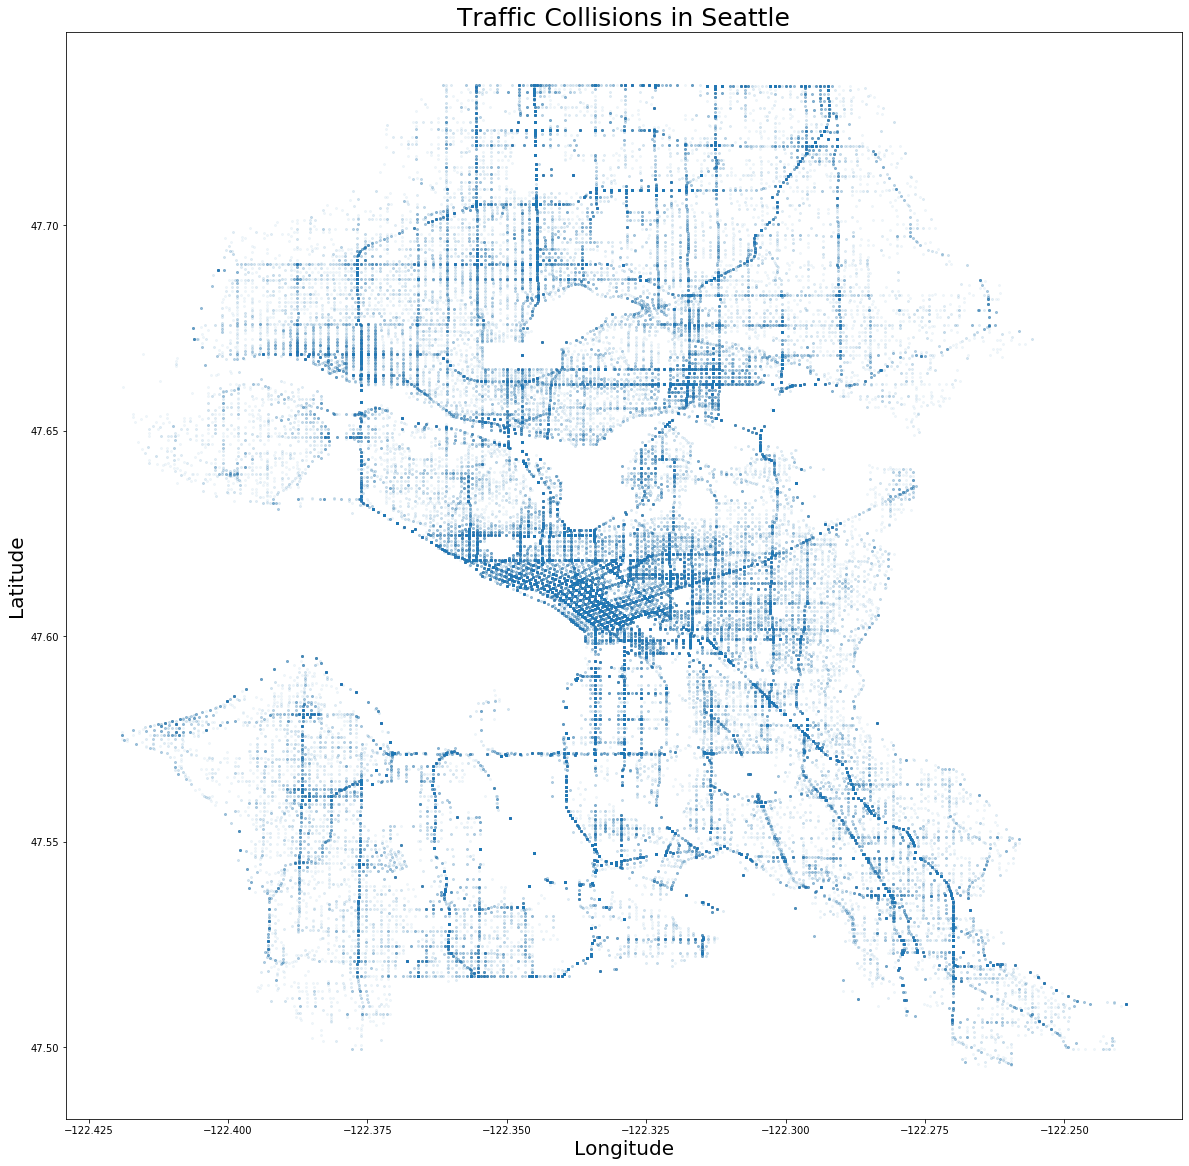

In [9]:
#scatter plot of all incidents
coordinates = df[['X','Y']]
coordinates = coordinates.dropna()
plt.figure(figsize=[20, 20])
plt.scatter(coordinates.X, coordinates.Y, alpha=0.05, s=4)
plt.title('Traffic Collisions in Seattle', size=25)
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)

plt.show()

In [10]:
import folium
from folium import plugins
from folium.plugins import MarkerCluster

latitude = 47.6062
longitude = -122.3321

seattle_map = folium.Map(location=[latitude, longitude], zoom_start=12)
incidents = MarkerCluster().add_to(seattle_map)

for lat, lng in zip(coordinates.Y[:7000], coordinates.X[:7000]):
#for lat, lng in zip(coordinates.Y, coordinates.X):
    folium.Marker(location=[lat, lng],
                  icon=None
                 ).add_to(incidents)

seattle_map

#### When did these accidents happen?
Throughout a day, there is a vast majority of collisions reported between midnight and 1 A.M. 
While from 7 A.M to the end of business hours(17 P.M) we see a increasing amount of incidents over the day with a peak at 17 P.M with a total of 12,947 cases.

||Total Cases|Portion|
|---|---|---|
|Midnight-1A.M|34,381|17.66%|
|Business Hours|70,530|36.23%|
|2h Prior&After Business Hours|37,806|19.42%|

Considering the days of the week, most incidents happened on a friday with 32,333(16.61%) cases reported while sunday was the least reported day with 21955(11.28%) incidents.

And considering months, most incidents happened on october with 17,768(9.13%) cases reported while february was the least reported day with 14,390(7.39%) incidents.

In [3]:
df['hour'] = pd.DatetimeIndex(df['INCDTTM']).hour
df['month'] = pd.DatetimeIndex(df['INCDTTM']).month # The month as January=1, December=12.
df['dayofweek'] = pd.DatetimeIndex(df['INCDTTM']).dayofweek # The day of the week with Monday=0, Sunday=6.

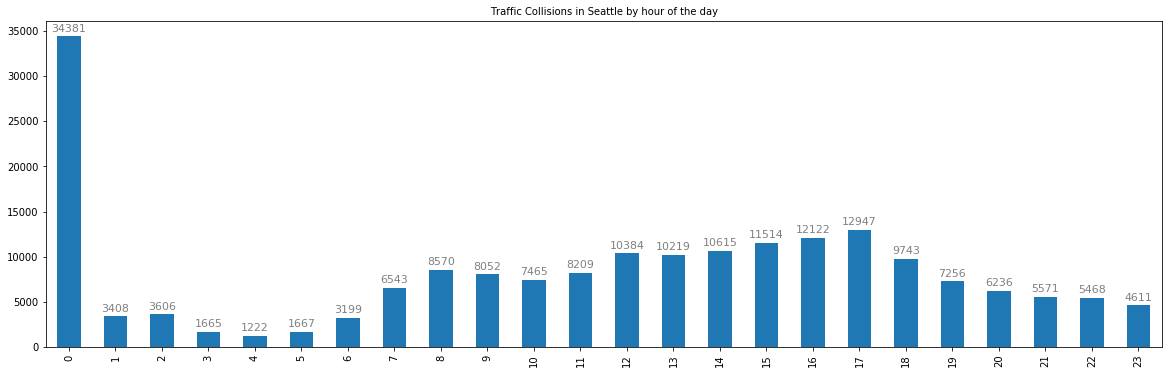

In [12]:
plt.figure(figsize=[20, 6])
splot = df['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Traffic Collisions in Seattle by hour of the day', size=10)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2., p.get_height()),
                   ha='center', va='center', fontsize=11, color='gray', xytext=(0, 8),
                   textcoords='offset points')
plt.show()

In [13]:
print('{}% of total occurences happened between midnight and 1 A.M.'.format(round(df[df.hour==0].shape[0]/df.shape[0]*100,2)))
print('{}% of total occurences happened between business hours.'.format(round(df[df['hour'].between(9, 17, inclusive=False)].shape[0]/df.shape[0]*100,2)))
print('{}% of total occurences happened 2h prior/after business hours.'.format(round(df.loc[df['hour'].isin([7, 8, 17, 18])].shape[0]/df.shape[0]*100,2)))
print('{} cases happened at 17 hours.'.format(round(df.loc[df['hour'].isin([17])].shape[0]),0))

17.66% of total occurences happened between midnight and 1 A.M.
36.23% of total occurences happened between business hours.
19.42% of total occurences happened 2h prior/after business hours.
12947 cases happened at 17 hours.


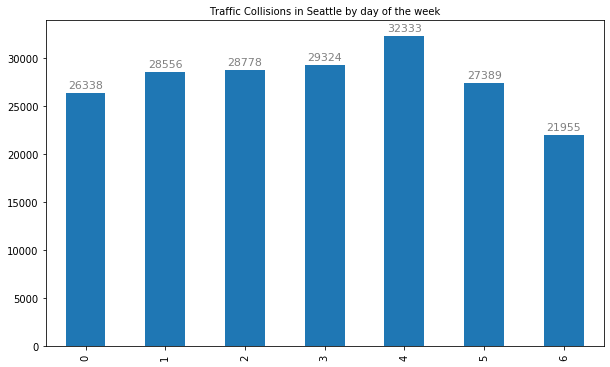

In [14]:
plt.figure(figsize=[10, 6])
splot = df['dayofweek'].value_counts().sort_index().plot(kind='bar')
plt.title('Traffic Collisions in Seattle by day of the week', size=10)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2., p.get_height()),
                   ha='center', va='center', fontsize=11, color='gray', xytext=(0, 8),
                   textcoords='offset points')
plt.show()
# The day of the week with Monday=0, Sunday=6.

In [15]:
print('Average occurence per dayofweek: {}({}%)'.format(round(df['dayofweek'].value_counts().mean(),0),
                                                        round(df['dayofweek'].value_counts().mean()/df.shape[0]*100,2)))
print('{}({}%) incidents on Friday.'.format(df[df.dayofweek==4].shape[0],
                                            round(df[df.dayofweek==4].shape[0]/df.shape[0]*100,2)))
print('{}({}%) incidents on Sunday.'.format(df[df.dayofweek==6].shape[0],
                                            round(df[df.dayofweek==6].shape[0]/df.shape[0]*100,2)))

Average occurence per dayofweek: 27810.0(14.29%)
32333(16.61%) incidents on Friday.
21955(11.28%) incidents on Sunday.


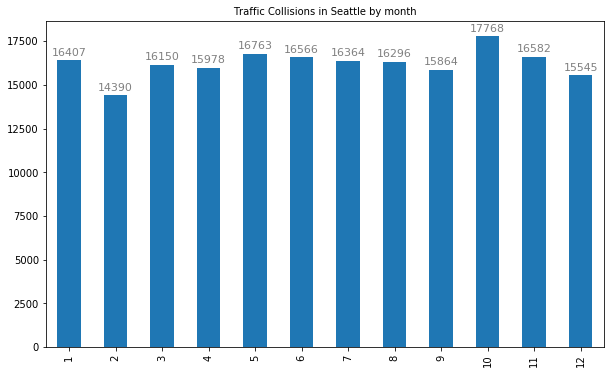

In [16]:
plt.figure(figsize=[10, 6])
splot = df['month'].value_counts().sort_index().plot(kind='bar')
plt.title('Traffic Collisions in Seattle by month', size=10)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2., p.get_height()),
                   ha='center', va='center', fontsize=11, color='gray', xytext=(0, 8),
                   textcoords='offset points')
plt.show()
# The month as January=1, December=12.

In [17]:
print('Average occurence per month: {}({}%)'.format(round(df['month'].value_counts().mean(),0),round(df['month'].value_counts().mean()/df.shape[0]*100,2)))
print('{}({}%) of total occurences in February.'.format(df[df.month==2].shape[0],round(df[df.month==2].shape[0]/df.shape[0]*100,2)))
print('{}({}%) of total occurences in October.'.format(df[df.month==10].shape[0],round(df[df.month==10].shape[0]/df.shape[0]*100,2)))

Average occurence per month: 16223.0(8.33%)
14390(7.39%) of total occurences in February.
17768(9.13%) of total occurences in October.


#### Annual amount of traffic incidents in Seattle
From 2014 to may/2020 there were a total amount of 194,673 traffic collision incidents. When we exclude the year of 2020, that doesn't have data from a full year we have an average of 16 year (2004-2019) of 12,027 collision cases per year with a standard deviation of 1,754 cases. 

We can visualize with the plots below that property damage only collisions happened about 2x more compared to injury related accidents. Also, since 2015 there is a constant decrease in accidents reported.

Text(0.5, 1.0, 'Annual traffic incidents in Seattle by Severity')

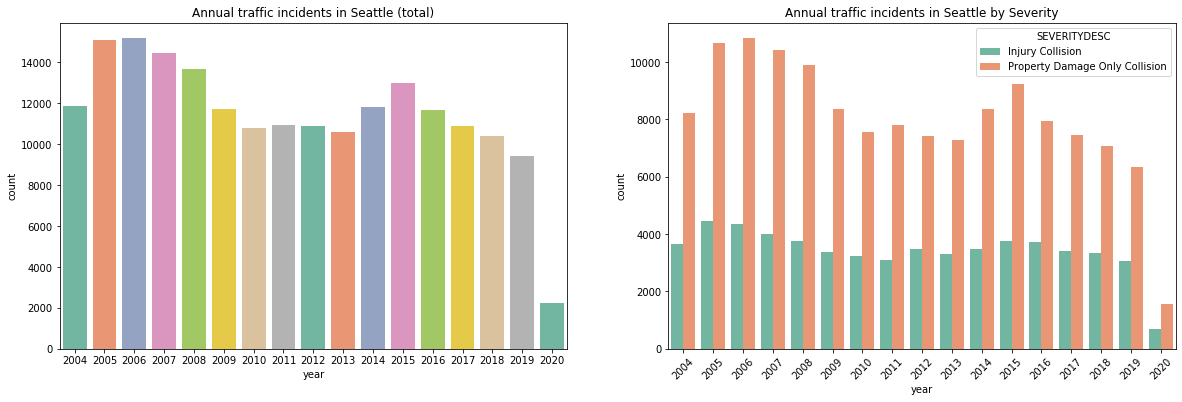

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))

df['year'] = pd.DatetimeIndex(df['INCDATE']).year
df['year'].value_counts().sort_index()
sns.countplot(x="year", data=df, ax=ax1, palette="Set2")
sns.countplot(x="year", hue="SEVERITYDESC", data=df, ax=ax2, palette="Set2")
plt.xticks(rotation=45)
ax1.set_title('Annual traffic incidents in Seattle (total)')
ax2.set_title('Annual traffic incidents in Seattle by Severity')

In [19]:
temp = df[df.year!=2020].year #exclude incidents from 2020 

print('Average of {} incidents per year'.format(round(temp.value_counts().mean(),0)), 
      'with a standard deviation of {}.'.format(round(temp.value_counts().std(),0)))
print('Max:', temp.value_counts().max(),
     '\nMin:', temp.value_counts().min())

Average of 12027.0 incidents per year with a standard deviation of 1754.0.
Max: 15188 
Min: 9412


#### Collision types 
There is a considerable difference on the collision occurences according to collision types. Being the most recurrent accidents with parked cars, angles and rear ended. These three together represent 59.97% of the total accidents reported during this 16year+ timeframe.

It's also noticable that only collisions involving pedestrians or cycles were reported to be more likely injury related collisions. 

|   |Pedestrian Collisions|Cycles Collisions|
|---|---|---|
|No injury portion|10.17%|12.39%|
|Injury portion|89.83%|87.61%|

In [4]:
df.replace({'COLLISIONTYPE': {np.nan: 'Unknown'}}, inplace=True)

In [21]:
df['COLLISIONTYPE'].value_counts().sort_values(ascending=False).to_frame()

,COLLISIONTYPE
Parked Car,47987
Angles,34674
Rear Ended,34090
Other,23703
Sideswipe,18609
Left Turn,13703
Pedestrian,6608
Cycles,5415
Unknown,4904
Right Turn,2956


In [22]:
total = df['COLLISIONTYPE'].value_counts()['Parked Car'] + \
        df['COLLISIONTYPE'].value_counts()['Rear Ended'] + \
        df['COLLISIONTYPE'].value_counts()['Angles']
print('Portion of 3 most common collision types: {}%'.format(round(total/df.shape[0]*100,2)))

Portion of 3 most common collision types: 59.97%


Text(0.5, 1.0, 'Collision Type Occurance')

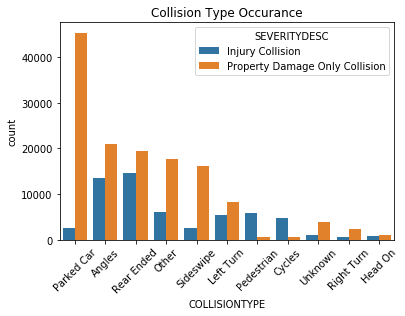

In [23]:
sns.countplot(x="COLLISIONTYPE", hue="SEVERITYDESC", data=df, order = df['COLLISIONTYPE'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Collision Type Occurance')

In [24]:
# Pedestrian rates
total = df['COLLISIONTYPE'].value_counts().Pedestrian #total
scode1 = df.loc[(df['COLLISIONTYPE']=='Pedestrian') & (df['SEVERITYCODE']==1)].shape[0] #no injury
scode2 = df.loc[(df['COLLISIONTYPE']=='Pedestrian') & (df['SEVERITYCODE']==2)].shape[0] #injury
print('[Pedestrian Collisions]')
print('No injury portion: {}%'.format(round(scode1/total*100,2)))
print('Prop. damage portion: {}%'.format(round(scode2/total*100,2)))

#Cycles rates
total = df['COLLISIONTYPE'].value_counts().Cycles #total
scode1 = df.loc[(df['COLLISIONTYPE']=='Cycles') & (df['SEVERITYCODE']==1)].shape[0] #prop damage
scode2 = df.loc[(df['COLLISIONTYPE']=='Cycles') & (df['SEVERITYCODE']==2)].shape[0] #injury
print('[Cycles Collisions]')
print('Prop. damage portion: {}%'.format(round(scode1/total*100,2)))
print('Injury portion: {}%'.format(round(scode2/total*100,2)))

[Pedestrian Collisions]
No injury portion: 10.17%
Prop. damage portion: 89.83%
[Cycles Collisions]
Prop. damage portion: 12.39%
Injury portion: 87.61%


#### Correlation between Severity Code and whether or not the collision involved hitting a parked car
- A vast majority of the accidents didn't involve hitting a parked car.
- Correlation between SEVERITYCODE and HITPARKEDCAR is of about -0.10.

N    187457
Y      7216
Name: HITPARKEDCAR, dtype: int64


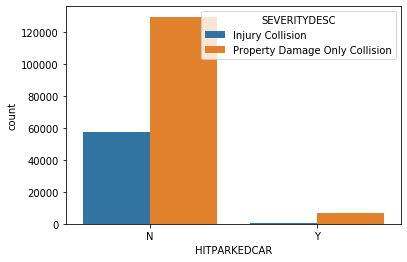

In [25]:
print(df['HITPARKEDCAR'].value_counts())
sns.countplot(x="HITPARKEDCAR", hue="SEVERITYDESC", data=df)

In [26]:
df['HITPARKEDCAR'].replace(to_replace=['N','Y'], value=[0,1],inplace=True) #cleaning data
print('Correlation:', df['HITPARKEDCAR'].corr(df['SEVERITYCODE']))

Correlation: -0.10149784205882287


#### Weather condition
The data shows that accident severity are most likely property damage only collisions independent on weather conditions. In number of occurences, dry weather incidents are the majority reported.

Now, comparing rainy with clear conditions, there is actually a increase of about 1.5% in chances there were injury when we look only the proportions. While comparing overcast with clear conditions, there is a decrease of about 0.7%. Those are really not strong values, so it's hard to say anything with that.

It would be interesting to check the correlations between WEATHER, SPEEDING and INATTENTIONIND(whether or not collision was due to inattention), but there are too many missing values, more than 85% of the data is missing.

|   |Clear Weather|Rainy Weather|Overcast Weather|
|---|---|---|---|
|No injury portion|67.75%|66.28%|68.45%|
|Injury portion|32.25%|33.72%|31.55%|

In [5]:
df.replace({'WEATHER': {np.nan: 'Unknown'}}, inplace=True)

In [28]:
df['WEATHER'].value_counts().sort_values(ascending=False).to_frame()

,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,20172
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

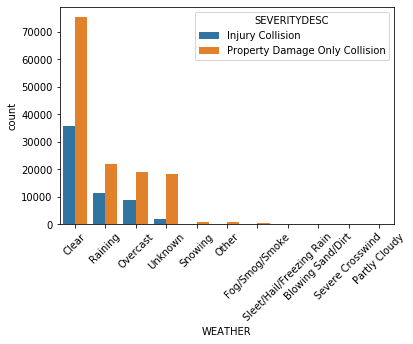

In [29]:
sns.countplot(x="WEATHER", hue="SEVERITYDESC", data=df, order = df['WEATHER'].value_counts().index)
plt.xticks(rotation=45)

In [30]:
#Clear rates
total = df['WEATHER'].value_counts().Clear #total
scode1 = df.loc[(df['WEATHER']=='Clear') & (df['SEVERITYCODE']==1)].shape[0] #no injury
scode2 = df.loc[(df['WEATHER']=='Clear') & (df['SEVERITYCODE']==2)].shape[0] #injury
print('[Clear Weather]')
print('No injury portion: {}%'.format(round(scode1/total*100,2)))
print('Injury portion: {}%'.format(round(scode2/total*100,2)))

#Rainy rates
total = df['WEATHER'].value_counts().Raining #total
scode1 = df.loc[(df['WEATHER']=='Raining') & (df['SEVERITYCODE']==1)].shape[0] #no injury
scode2 = df.loc[(df['WEATHER']=='Raining') & (df['SEVERITYCODE']==2)].shape[0] #injury
print('[Rainy Weather]')
print('No injury portion: {}%'.format(round(scode1/total*100,2)))
print('Injury portion: {}%'.format(round(scode2/total*100,2)))

#Overcast rates
total = df['WEATHER'].value_counts().Overcast #total
scode1 = df.loc[(df['WEATHER']=='Overcast') & (df['SEVERITYCODE']==1)].shape[0] #no injury
scode2 = df.loc[(df['WEATHER']=='Overcast') & (df['SEVERITYCODE']==2)].shape[0] #injury
print('[Overcast Weather]')
print('No injury portion: {}%'.format(round(scode1/total*100,2)))
print('Injury portion: {}%'.format(round(scode2/total*100,2)))

[Clear Weather]
No injury portion: 67.75%
Injury portion: 32.25%
[Rainy Weather]
No injury portion: 66.28%
Injury portion: 33.72%
[Overcast Weather]
No injury portion: 68.45%
Injury portion: 31.55%


#### The condition of the road during the collision
The proportions are very similar, chances are no injury related accidents are twice more likely to happen compared to injury related accidents when we consider Wet or Dry road conditions. More occurences in dry road conditions are recorded and when we look into the proportions it indicates that in wet road conditions there is a 1% more chance its an injury severity incident compared to a dry road case.

|   |Wet Road|Dry Road|
|---|---|---|
|No injury portion|66.81%|67.82%|
|Injury portion|33.19%|32.18%|

In [6]:
df.replace({'ROADCOND': {np.nan: 'Unknown'}}, inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

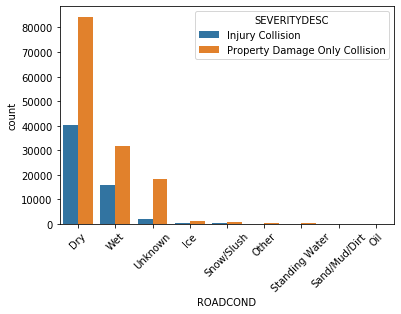

In [32]:
sns.countplot(x="ROADCOND", hue="SEVERITYDESC", data=df, order = df['ROADCOND'].value_counts().index)
plt.xticks(rotation=45)

In [33]:
#Wet rates
total = df['ROADCOND'].value_counts().Wet #total
scode1 = df.loc[(df['ROADCOND']=='Wet') & (df['SEVERITYCODE']==1)].shape[0] #no injury
scode2 = df.loc[(df['ROADCOND']=='Wet') & (df['SEVERITYCODE']==2)].shape[0] #Injury
print('[Wet Road Condition]')
print('No injury portion: {}%'.format(round(scode1/total*100,2)))
print('Injury portion: {}%'.format(round(scode2/total*100,2)))

#Dry rates
total = df['ROADCOND'].value_counts().Dry #total
scode1 = df.loc[(df['ROADCOND']=='Dry') & (df['SEVERITYCODE']==1)].shape[0] #no injury
scode2 = df.loc[(df['ROADCOND']=='Dry') & (df['SEVERITYCODE']==2)].shape[0] #Injury
print('[Dry Road Condition]')
print('No injury portion: {}%'.format(round(scode1/total*100,2)))
print('Injury portion: {}%'.format(round(scode2/total*100,2)))

[Wet Road Condition]
No injury portion: 66.81%
Injury portion: 33.19%
[Dry Road Condition]
No injury portion: 67.82%
Injury portion: 32.18%


#### The light conditions during the collision
Consistenly to traffic collisions distribution by hour of the day shown before, most incidents happened during the day time, night cases being less than half of the occurrences. 

In [7]:
df.replace({'LIGHTCOND': {np.nan: 'Unknown'}}, inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

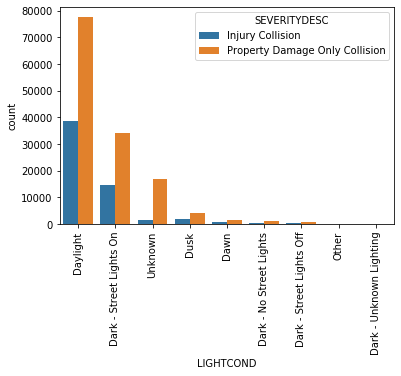

In [35]:
sns.countplot(x="LIGHTCOND", hue="SEVERITYDESC", data=df, order = df['LIGHTCOND'].value_counts().index)
plt.xticks(rotation=90)

In [81]:
df['LIGHTCOND'].unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       'Unknown', 'Dusk', 'Dawn', 'Dark - Street Lights Off', 'Other',
       'Dark - Unknown Lighting'], dtype=object)

In [84]:
total = df['LIGHTCOND'].value_counts().Daylight #total
scode1 = df.loc[(df['LIGHTCOND']=='Daylight') & (df['SEVERITYCODE']==1)].shape[0] #no injury
scode2 = df.loc[(df['LIGHTCOND']=='Daylight') & (df['SEVERITYCODE']==2)].shape[0] #Injury
print('[Daylight Condition]')
print('No injury portion: {}%'.format(round(scode1/total*100,2)))
print('Injury portion: {}%'.format(round(scode2/total*100,2)))

total = df['LIGHTCOND'].value_counts().Dawn #total
scode1 = df.loc[(df['LIGHTCOND']=='Dawn') & (df['SEVERITYCODE']==1)].shape[0] #no injury
scode2 = df.loc[(df['LIGHTCOND']=='Dawn') & (df['SEVERITYCODE']==2)].shape[0] #Injury
print('[Dawn Condition]')
print('No injury portion: {}%'.format(round(scode1/total*100,2)))
print('Injury portion: {}%'.format(round(scode2/total*100,2)))

total = df['LIGHTCOND'].value_counts()['Dark - Street Lights On'] #total
scode1 = df.loc[(df['LIGHTCOND']=='Dark - Street Lights On') & (df['SEVERITYCODE']==1)].shape[0] #no injury
scode2 = df.loc[(df['LIGHTCOND']=='Dark - Street Lights On') & (df['SEVERITYCODE']==2)].shape[0] #Injury
print('[Dark - Street Lights On Condition]')
print('No injury portion: {}%'.format(round(scode1/total*100,2)))
print('Injury portion: {}%'.format(round(scode2/total*100,2)))

total = df['LIGHTCOND'].value_counts()['Dark - Street Lights Off'] #total
scode1 = df.loc[(df['LIGHTCOND']=='Dark - Street Lights Off') & (df['SEVERITYCODE']==1)].shape[0] #no injury
scode2 = df.loc[(df['LIGHTCOND']=='Dark - Street Lights Off') & (df['SEVERITYCODE']==2)].shape[0] #Injury
print('[Dark - Street Lights Off Condition]')
print('No injury portion: {}%'.format(round(scode1/total*100,2)))
print('Injury portion: {}%'.format(round(scode2/total*100,2)))

total = df['LIGHTCOND'].value_counts()['Dark - No Street Lights'] #total
scode1 = df.loc[(df['LIGHTCOND']=='Dark - No Street Lights') & (df['SEVERITYCODE']==1)].shape[0] #no injury
scode2 = df.loc[(df['LIGHTCOND']=='Dark - No Street Lights') & (df['SEVERITYCODE']==2)].shape[0] #Injury
print('[Dark - No Street Lights Condition]')
print('No injury portion: {}%'.format(round(scode1/total*100,2)))
print('Injury portion: {}%'.format(round(scode2/total*100,2)))

total = df['LIGHTCOND'].value_counts()['Dark - Unknown Lighting'] #total
scode1 = df.loc[(df['LIGHTCOND']=='Dark - Unknown Lighting') & (df['SEVERITYCODE']==1)].shape[0] #no injury
scode2 = df.loc[(df['LIGHTCOND']=='Dark - Unknown Lighting') & (df['SEVERITYCODE']==2)].shape[0] #Injury
print('[Dark - Unknown Lighting Condition]')
print('No injury portion: {}%'.format(round(scode1/total*100,2)))
print('Injury portion: {}%'.format(round(scode2/total*100,2)))

total = df['LIGHTCOND'].value_counts().Dusk #total
scode1 = df.loc[(df['LIGHTCOND']=='Dusk') & (df['SEVERITYCODE']==1)].shape[0] #no injury
scode2 = df.loc[(df['LIGHTCOND']=='Dusk') & (df['SEVERITYCODE']==2)].shape[0] #Injury
print('[Dusk Condition]')
print('No injury portion: {}%'.format(round(scode1/total*100,2)))
print('Injury portion: {}%'.format(round(scode2/total*100,2)))

[Daylight Condition]
No injury portion: 66.81%
Injury portion: 33.19%
[Dawn Condition]
No injury portion: 67.07%
Injury portion: 32.93%
[Dark - Street Lights On Condition]
No injury portion: 70.16%
Injury portion: 29.84%
[Dark - Street Lights Off Condition]
No injury portion: 73.64%
Injury portion: 26.36%
[Dark - No Street Lights Condition]
No injury portion: 78.27%
Injury portion: 21.73%
[Dark - Unknown Lighting Condition]
No injury portion: 63.64%
Injury portion: 36.36%
[Dusk Condition]
No injury portion: 67.06%
Injury portion: 32.94%


#### Driver under influence of drugs or alcohol
Most of the reported collision incidents happened with drivers not under influence of drugs or alcohol. But when driver was under influence, injury related accidents increased in almost 10%.

|   |UNDERINFL|Not UNDERINFL|
|---|---|---|
|No injury portion|70.33%|60.95%|
|Injury portion|29.67%|39.05%|

(array([0, 1]), <a list of 2 Text xticklabel objects>)

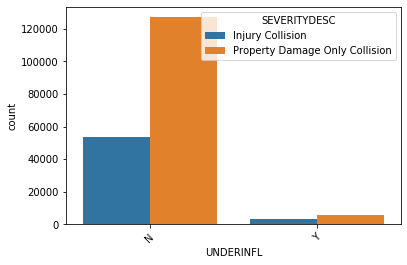

In [8]:
df['UNDERINFL'].replace(to_replace=['N','Y','0','1'], value=['N','Y','N','Y'],inplace=True) #cleaning data

sns.countplot(x="UNDERINFL", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=45)

In [37]:
df['UNDERINFL'].value_counts()[0]

180668

In [38]:
#Not under influence
total = df['UNDERINFL'].value_counts()[0] #total
scode1 = df.loc[(df['UNDERINFL']=='N') & (df['SEVERITYCODE']==1)].shape[0] #no injury
scode2 = df.loc[(df['UNDERINFL']=='N') & (df['SEVERITYCODE']==2)].shape[0] #Injury
print('[Not UNDERINFL Condition]')
print('No injury portion: {}%'.format(round(scode1/total*100,2)))
print('Injury portion: {}%'.format(round(scode2/total*100,2)))

#Under influence
total = df['UNDERINFL'].value_counts()[1] #total
scode1 = df.loc[(df['UNDERINFL']=='Y') & (df['SEVERITYCODE']==1)].shape[0] #no injury
scode2 = df.loc[(df['UNDERINFL']=='Y') & (df['SEVERITYCODE']==2)].shape[0] #Injury
print('[UNDERINFL Condition]')
print('No injury portion: {}%'.format(round(scode1/total*100,2)))
print('Injury portion: {}%'.format(round(scode2/total*100,2)))

[Not UNDERINFL Condition]
No injury portion: 70.33%
Injury portion: 29.67%
[UNDERINFL Condition]
No injury portion: 60.95%
Injury portion: 39.05%


#### JUNCTIONTYPE
There are 6 categories:
- At Intersection (intersection related)
- At Intersection (but not related to intersection)
- Mid-Block (not related to intersection)
- Mid-Block (but intersection related)
- Driveway Junction
- Ramp Junction
- Unknown

In [9]:
df.replace({'JUNCTIONTYPE': {np.nan: 'Unknown'}}, inplace=True)

In [40]:
df['JUNCTIONTYPE'].unique()

array(['At Intersection (intersection related)',
       'Mid-Block (not related to intersection)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'At Intersection (but not related to intersection)', 'Unknown',
       'Ramp Junction'], dtype=object)

In [41]:
df['JUNCTIONTYPE'].value_counts().sort_values(ascending=False).to_frame()

,JUNCTIONTYPE
Mid-Block (not related to intersection),89800
At Intersection (intersection related),62810
Mid-Block (but intersection related),22790
Driveway Junction,10671
Unknown,6338
At Intersection (but not related to intersection),2098
Ramp Junction,166


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

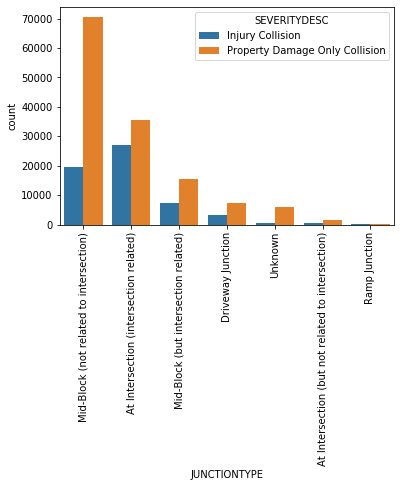

In [42]:
sns.countplot(x="JUNCTIONTYPE", hue="SEVERITYDESC", data=df, order = df['JUNCTIONTYPE'].value_counts().index)
plt.xticks(rotation=90)

#### ADDRTYPE
There are 3 categories for collision address types:
- Intersection
- Block
- Alley

**To keep in mind:** JUNCTIONTYPE and ADDRTYPE have very similar information.

|   |Intersection|Block|Alley|
|---|---|---|---|
|No injury portion|57.25%|76.29%|89.08%|
|Injury portion|42.75%|23.71%|10.92%|
|Total Cases|65,070|126,926|751|

In [10]:
df.replace({'ADDRTYPE': {np.nan: 'Unknown'}}, inplace=True)

In [44]:
df['ADDRTYPE'].unique()

array(['Intersection', 'Block', 'Alley', 'Unknown'], dtype=object)

In [45]:
df['ADDRTYPE'].value_counts().sort_values(ascending=False).to_frame()

,ADDRTYPE
Block,126926
Intersection,65070
Unknown,1926
Alley,751


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

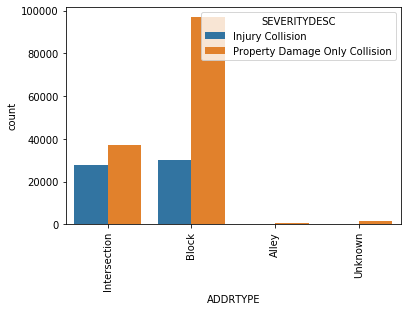

In [46]:
sns.countplot(x="ADDRTYPE", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=90)

In [47]:
#ADDRTYPE=Intersection
total = df['ADDRTYPE'].value_counts().Intersection #total
scode1 = df.loc[(df['ADDRTYPE']=='Intersection') & (df['SEVERITYCODE']==1)].shape[0] #no injury
scode2 = df.loc[(df['ADDRTYPE']=='Intersection') & (df['SEVERITYCODE']==2)].shape[0] #Injury
print('[ADDRTYPE=Intersection]')
print('No injury portion: {}%'.format(round(scode1/total*100,2)))
print('Injury portion: {}%'.format(round(scode2/total*100,2)))
#ADDRTYPE=Block
total = df['ADDRTYPE'].value_counts().Block #total
scode1 = df.loc[(df['ADDRTYPE']=='Block') & (df['SEVERITYCODE']==1)].shape[0] #no injury
scode2 = df.loc[(df['ADDRTYPE']=='Block') & (df['SEVERITYCODE']==2)].shape[0] #Injury
print('[ADDRTYPE=Block]')
print('No injury portion: {}%'.format(round(scode1/total*100,2)))
print('Injury portion: {}%'.format(round(scode2/total*100,2)))
#ADDRTYPE=Alley
total = df['ADDRTYPE'].value_counts().Alley #total
scode1 = df.loc[(df['ADDRTYPE']=='Alley') & (df['SEVERITYCODE']==1)].shape[0] #no injury
scode2 = df.loc[(df['ADDRTYPE']=='Alley') & (df['SEVERITYCODE']==2)].shape[0] #Injury
print('[ADDRTYPE=Alley]')
print('No injury portion: {}%'.format(round(scode1/total*100,2)))
print('Injury portion: {}%'.format(round(scode2/total*100,2)))

[ADDRTYPE=Intersection]
No injury portion: 57.25%
Injury portion: 42.75%
[ADDRTYPE=Block]
No injury portion: 76.29%
Injury portion: 23.71%
[ADDRTYPE=Alley]
No injury portion: 89.08%
Injury portion: 10.92%


#### Effects of the pandemic
With the first case of COVID-19 reported in December-2019 in Wuhan City, China. Not long after, the first case in the US happened, more specifically on 20th January. The virus spread quickly affecting our routines like never before.
The graph below shows clearly there is a big drop in collision cases in 2020 showing that COVID has indeed affected peoples driving routine.

In [48]:
past = df[df.year!=2020]['month'].value_counts().sort_index()/16 #average per month from 2019-2004 = 16 years
past_19 = df[df.year==2019]['month'].value_counts().sort_index()
curr = df[df.year==2020]['month'].value_counts().sort_index()

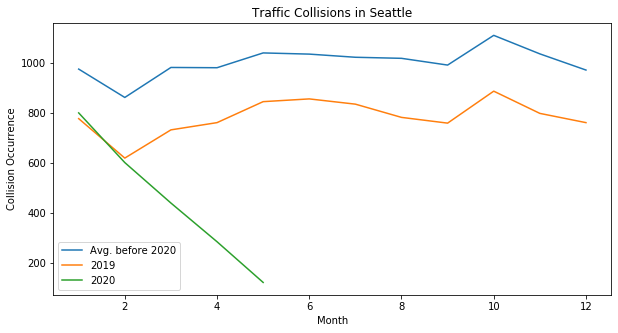

In [49]:
plt.figure(figsize=[10, 5])
plt.plot(past)
plt.plot(past_19)
plt.plot(curr)
plt.title('Traffic Collisions in Seattle')
plt.xlabel('Month')
plt.ylabel('Collision Occurrence')
plt.legend(['Avg. before 2020', '2019','2020'])
plt.show()

#### About the Dataset - Key Findings
- There is a concentration of cases in the Central Area of Seattle.
- In a 24 hours timeframe, there is a vast majority of cases concentrated between midnight and 1 A.M. More precisely, 17.66% of the total amount of cases were reported in this single hour. 
- In the weekly timeframe, most incidents happened on a friday while the least on sundays, with a difference of 5.33%.
- In the monthly timeframe, most incidents happened on october while the least on february, with a difference of 1.74%. 
- Since 2015, there is a yearly decrease in collision cases reported.
- No-injury related accidents are the most recurrent. That only changes when the case involves pedestrians or cycles.
- Accidents related to parked cars, angles and rear ended are the most recurrent, representing 60% of the total accidents reported.
- Incidents in dry weather and road conditions are the majority reported. 
- Most incidents happened during the day time, night cases being less than half of the occurences.
- Incidents involving drivers under influence of drugs or alcohol have 10% more chance to be injury related accidents.
- Most incidents happened in Blocks (address type) with a 23.71% of cases being injury related. This number jumps to 42.75% when the collision happens to be in a Intersection. 
- In 2020 with the effects of the pandemic, collision cases dropped significantly compared to the historical data.

## Methodology<a name="methodology"></a>
### Data preparation and cleaning
Data cleaning procedure to make the dataset readable and suitable for the machine learning algorithms.
- **Dropping irrelevant variables:** Out of the 37 attributes, I will not consider the features with over 40% of missing data, other unclear and irrelevant/noisy variables to our problem.
- **Dealing with missing values:** As my chosen attributes have about 3% of missing data I'll just drop them. I'll still have a considerable amount of data.
- **Treating categorical variables:** Almost all attributes are categorical. For the categorical variables, I will apply target encoding.
- **Train/Test split and data normalization:** Now that I treated all my variables I'll separate my independent variables to dataset A and dependent variable 'SEVERITYCODE' to dataset B. After, I'll use this data to randomly pick samples and split in this ratio: 70% to train my model/30% to test my model. Following the split I'll normalize all data to make sure my features are on a similar scale.


### Classification: Modelling and Evaluation
The prepared dataset will be used to model 3 classification models. 
- **Logistic Regression:** Classifies data by estimating the probability of classes.
- **Decision Tree:** Classifies by breaking down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed.
- **KNN:** Classifies unseen data through the majority of its 'neighbours'. In this case we already know K=2 (2 classes of SEVERITY CODES).
After obtaining each model's predictions we will evaluate their performance with accuracy, precison, f1-score and compare and discuss the results. 

### Discussion and Conclusion
After obtaining the results and evaluating them, in this section I will brief any observations noted based on the results. Finally, will conclude the results of this analysis.


## Data Preparation and Cleaning
### Dropping Irrelevant Variables & Dealing With Missing Values
During EDA, for the features [COLLISIONTYPE, WETHER, ROADCOND, LIGHTCOD, ADDRTYPE, JUNCTIONTYPE] - 
where value was missing I imputed to the 'Unknown' category.

In [23]:
data = df[['COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'UNDERINFL', 'ADDRTYPE','JUNCTIONTYPE', 'hour', 'SEVERITYCODE']]
data = data.dropna() #drop missing values (about 2.5%)
print('Initial dataset shape:', df.shape)
print('Usable dataset shape:', data.shape)

Initial dataset shape: (194673, 41)
Usable dataset shape: (189789, 9)


In [24]:
data.head(10)

,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL,ADDRTYPE,JUNCTIONTYPE,hour,SEVERITYCODE
0,Angles,Overcast,Wet,Daylight,N,Intersection,At Intersection (intersection related),14,2
1,Sideswipe,Raining,Wet,Dark - Street Lights On,N,Block,Mid-Block (not related to intersection),18,1
2,Parked Car,Overcast,Dry,Daylight,N,Block,Mid-Block (not related to intersection),10,1
3,Other,Clear,Dry,Daylight,N,Block,Mid-Block (not related to intersection),9,1
4,Angles,Raining,Wet,Daylight,N,Intersection,At Intersection (intersection related),8,2
5,Angles,Clear,Dry,Daylight,N,Intersection,At Intersection (intersection related),17,1
6,Angles,Raining,Wet,Daylight,N,Intersection,At Intersection (intersection related),0,1
7,Cycles,Clear,Dry,Daylight,N,Intersection,At Intersection (intersection related),17,2
8,Parked Car,Clear,Dry,Daylight,N,Block,Mid-Block (not related to intersection),13,1
9,Angles,Clear,Dry,Daylight,N,Intersection,At Intersection (intersection related),15,2


In [13]:
data.dtypes

COLLISIONTYPE    object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
UNDERINFL        object
ADDRTYPE         object
JUNCTIONTYPE     object
hour              int64
SEVERITYCODE      int64
dtype: object

In [14]:
data['SEVERITYCODE'].value_counts()

1    132630
2     57159
Name: SEVERITYCODE, dtype: int64

### Treating Categorical Variables

In [70]:
from category_encoders import TargetEncoder

features = data[['COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ADDRTYPE', 'JUNCTIONTYPE']]
#features = data[['COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]
X = features
y = data['SEVERITYCODE'].values

enc = TargetEncoder(cols=X.columns)
X = enc.fit_transform(X, y)
X.head()

C:\Users\juinj\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE,JUNCTIONTYPE
0,1.392917,1.315544,1.331866,1.331884,1.431269,1.436488
1,1.134666,1.337185,1.331866,1.298411,1.238525,1.217238
2,1.055473,1.315544,1.321773,1.331884,1.238525,1.217238
3,1.257858,1.322491,1.321773,1.331884,1.238525,1.217238
4,1.392917,1.337185,1.331866,1.331884,1.431269,1.436488


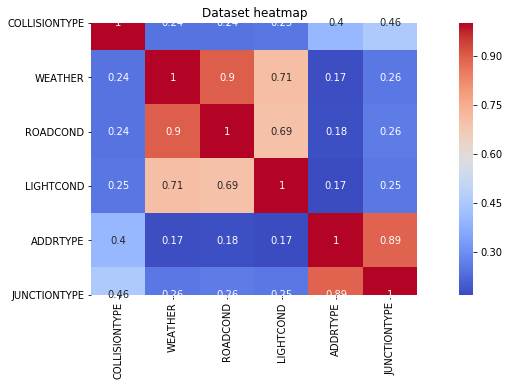

In [86]:
plt.figure(figsize=(15,5))
plt.title('Dataset heatmap')
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', square=True)
plt.show()

### Train/Test Split & Data Normalization

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.head()

,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE,JUNCTIONTYPE
7376,1.055473,1.315544,1.321773,1.331884,1.238525,1.217238
154616,1.392917,1.315544,1.321773,1.329380,1.431269,1.436488
58934,1.055473,1.322491,1.321773,1.331884,1.238525,1.217238
131347,1.430361,1.337185,1.331866,1.331884,1.238525,1.217238
39968,1.394877,1.322491,1.321773,1.331884,1.431269,1.436488


In [89]:
from sklearn import preprocessing

X= preprocessing.StandardScaler().fit(X).transform(X)
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
print(X_train[0:5])
print('----------------------------------------------------')
print(X_test[0:5])

[[-1.15208708  0.19151094  0.27188565  0.41984463 -0.66823372 -0.79987054]
 [ 0.43148239  0.19151094  0.27188565  0.38536566  1.38797281  1.28644736]
 [-1.15208708  0.285493    0.27188565  0.41984463 -0.66823372 -0.79987054]
 [ 0.60720086  0.48430934  0.40689183  0.41984463 -0.66823372 -0.79987054]
 [ 0.44068108  0.285493    0.27188565  0.41984463  1.38797281  1.28644736]]
----------------------------------------------------
[[ 0.43513589  0.29133579  0.2789879   0.42392171  1.38813374  1.28770394]
 [-1.14878962  0.29133579  0.2789879  -0.03045973 -0.66870771 -0.79424727]
 [ 0.42598828  0.48744157  0.4115012  -0.03045973  1.38813374  1.28770394]
 [-1.14878962 -2.15180818 -3.27234877 -3.42414445 -0.66870771 -0.79424727]
 [ 0.6007312   0.48744157  0.4115012   0.42392171 -0.66870771 -0.79424727]]


## 2. Classification: Modeling and Evaluation
### KNN

In [90]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 2).fit(X_train, y_train)
model_knn

KNeighborsClassifier(n_neighbors=2)

### Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(C=0.0001, solver='liblinear')
model_lr.fit(X_train, y_train)
model_lr

LogisticRegression(C=0.0001, solver='liblinear')

### Decision Tree

In [98]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4, random_state=27)
model_tree.fit(X_train, y_train)
model_tree 

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=27)

### Hyperparameter Tuning

In [118]:
from sklearn.model_selection import GridSearchCV

knn_grid_param = {'n_neighbors': [5, 7, 10],
                  'weights': ['uniform', 'distance'],
                  'metric': ['minkowski'],
                  'p': [1, 2],
                  'n_jobs': [None, -1]}
dt_grid_param = {'criterion': ['gini', 'entropy'],
                 'max_features': ['auto', 'sqrt', 'log2'],
                 'max_depth': [4, 5, 7, None],
                 'min_samples_split': [2, 3, 5, 7],
                 'min_samples_leaf': [1, 3, 5, 7]}
log_grid_param = {'penalty': ['l1', 'l2'],
                  'C': np.logspace(-4, 4, 20),
                  'solver': ['liblinear', 'saga']}

gs_model_tree = GridSearchCV(estimator=model_tree,
                             param_grid=dt_grid_param,
                             cv =5,
                             scoring='roc_auc',
                             verbose=2,
                             n_jobs = -1)
gs_model_lr = GridSearchCV(estimator=model_lr,
                           param_grid=log_grid_param,
                           cv =5,
                           scoring='roc_auc',
                           verbose=2,
                           n_jobs = -1)
gs_model_knn = GridSearchCV(estimator=model_knn,
                            param_grid=knn_grid_param,
                            cv =5,
                            scoring='roc_auc',
                            verbose=2,
                            n_jobs = -1)

gs_models = [gs_model_knn, gs_model_tree, gs_model_lr]
for model in gs_models:
    model.fit(X_train, y_train)
    model = model.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 52.3min finished


Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  2.8min finished


Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  2.8min finished


In [119]:
print(gs_model_tree)
print(gs_model_knn)
print(gs_model_lr)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              max_features='auto',
                                              min_samples_leaf=7,
                                              random_state=27),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 7, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [2, 3, 5, 7]},
             scoring='roc_auc', verbose=2)
GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=2), n_jobs=-1,
             param_grid={'metric': ['minkowski'], 'n_jobs': [None, -1],
                         'n_neighbors': [5, 7, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc', verbose=2)
GridSearchCV(cv=5, estimator=L

In [120]:
#KNN
yhat = gs_model_knn.predict(X_test)
yhat_knn = yhat
train_score = metrics.accuracy_score(y_train, gs_model_knn.predict(X_train))
test_score = metrics.accuracy_score(y_test, yhat)
jaccard = jaccard_score(y_test, yhat)
f1_score_knn = f1_score(y_test, yhat, average='weighted')
precision_knn = precision_score(y_test, yhat, average='weighted')
knn_report = ['KNN', round(train_score,4), round(test_score,4), 
              round(jaccard,4), round(f1_score_knn,4), round(precision_knn,4)]

# Decission tree 
yhat = gs_model_tree.predict(X_test)
yhat_tree = yhat
train_score = metrics.accuracy_score(y_train, gs_model_tree.predict(X_train))
test_score = metrics.accuracy_score(y_test, yhat)
jaccard = jaccard_score(y_test, yhat)
f1_score_tree = f1_score(y_test, yhat, average='weighted')
precision_tree = precision_score(y_test, yhat, average='weighted')
tree_report = ['Decision Tree', round(train_score,4), round(test_score,4),
               round(jaccard,4), round(f1_score_tree,4), round(precision_tree,4)]

# Logistic regression
yhat_proba = gs_model_lr.predict_proba(X_test)
yhat = model_lr.predict(X_test)
yhat_lr = yhat
train_score = metrics.accuracy_score(y_train, gs_model_lr.predict(X_train))
test_score = metrics.accuracy_score(y_test, yhat)
jaccard = jaccard_score(y_test, yhat)
f1_score_lr = f1_score(y_test, yhat, average='weighted')
precision_lr = precision_score(y_test, yhat, average='weighted')
lr_report = ['Logistic Regression', round(train_score,4), round(test_score,4),
             round(jaccard,4), round(f1_score_lr,4), round(precision_lr,4)]

In [121]:
report = pd.DataFrame(data=np.array([knn_report, tree_report, lr_report]), 
                      columns=['Algorithm', 'Training Accuracy','Test Accuracy', 'Jaccard', 'F1-score', 'Precision'])
report

,Algorithm,Training Accuracy,Test Accuracy,Jaccard,F1-score,Precision
0,KNN,0.7398,0.7382,0.7135,0.7014,0.7211
1,Decision Tree,0.7495,0.7469,0.7313,0.6846,0.7757
2,Logistic Regression,0.7482,0.7473,0.7318,0.6847,0.7779


## Model Evaluation using Test set

In [105]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
# KNN
yhat = model_knn.predict(X_test)
yhat_knn = yhat
train_score = metrics.accuracy_score(y_train, model_knn.predict(X_train))
test_score = metrics.accuracy_score(y_test, yhat)
jaccard = jaccard_score(y_test, yhat)
f1_score_knn = f1_score(y_test, yhat, average='weighted')
precision_knn = precision_score(y_test, yhat, average='weighted')
knn_report = ['KNN', round(train_score,4), round(test_score,4), 
              round(jaccard,4), round(f1_score_knn,4), round(precision_knn,4)]

# Decission tree 
yhat = model_tree.predict(X_test)
yhat_tree = yhat
train_score = metrics.accuracy_score(y_train, model_tree.predict(X_train))
test_score = metrics.accuracy_score(y_test, yhat)
jaccard = jaccard_score(y_test, yhat)
f1_score_tree = f1_score(y_test, yhat, average='weighted')
precision_tree = precision_score(y_test, yhat, average='weighted')
tree_report = ['Decision Tree', round(train_score,4), round(test_score,4),
               round(jaccard,4), round(f1_score_tree,4), round(precision_tree,4)]

# Logistic regression
yhat_proba = model_lr.predict_proba(X_test)
yhat = model_lr.predict(X_test)
yhat_lr = yhat
train_score = metrics.accuracy_score(y_train, model_lr.predict(X_train))
test_score = metrics.accuracy_score(y_test, yhat)
jaccard = jaccard_score(y_test, yhat)
f1_score_lr = f1_score(y_test, yhat, average='weighted')
precision_lr = precision_score(y_test, yhat, average='weighted')
lr_report = ['Logistic Regression', round(train_score,4), round(test_score,4),
             round(jaccard,4), round(f1_score_lr,4), round(precision_lr,4)]

In [106]:
report = pd.DataFrame(data=np.array([knn_report, tree_report, lr_report]), 
                      columns=['Algorithm', 'Training Accuracy','Test Accuracy', 'Jaccard', 'F1-score', 'Precision'])
report

,Algorithm,Training Accuracy,Test Accuracy,Jaccard,F1-score,Precision
0,KNN,0.7238,0.7233,0.6967,0.6907,0.6984
1,Decision Tree,0.7495,0.7469,0.7313,0.6846,0.7757
2,Logistic Regression,0.7475,0.7473,0.7318,0.6847,0.7779


For all three models Jaccard score, which measures accuracy is above 70%. With a 5% better accuracy the highest accuracy model is the Decision Tree Classifier. The same model also presents the best F1_score and Recall(True positive rate).

In [62]:
from sklearn.metrics import confusion_matrix

print('KNN Confusion Matrix')
tn, fp, fn, tp = confusion_matrix(y_test, yhat_knn).ravel()
(tn, fp, fn, tp)

KNN Confusion Matrix


(34313, 5446, 11599, 5579)

In [63]:
print('Decision Tree Confusion Matrix')
tn, fp, fn, tp = confusion_matrix(y_test, yhat_tree).ravel()
(tn, fp, fn, tp)

Decision Tree Confusion Matrix


(39333, 426, 13942, 3236)

In [64]:
print('Logistic Regression Confusion Matrix')
tn, fp, fn, tp = confusion_matrix(y_test, yhat_lr).ravel()
(tn, fp, fn, tp)

Logistic Regression Confusion Matrix


(39332, 427, 13937, 3241)

### Handling Imbalance

In [ ]:
#from imblearn.under_sampling import EditedNearestNeighbours as ENN
#from imblearn.under_sampling import TomekLinks

#undersample = TomekLinks()
#undersample = ENN(n_neighbors=2)
#X_train, y_train = undersample.fit_resample(X_train, y_train)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_split=10, shuffle=True, random_state=0)
for model in models:
    model.fit(X_train, y_train)
    score = cross_val_score(model, X_train, y_train, scoring ='accuracy', cv=kfold,n_jobs=-1)
    score

From the Confusion Matrixes we can see also exactly the amount of samples that were classified rightfully and wrongfully. Its noticable the variation jump that happens when comparing false positives and true positives while true negatives and false negatives are quite stable.

## 3. Discussion and Conclusion
In this analysis we evaluated the performance of 3 machine learning algorithms on the Seattle Collision dataset to predict the severity of an accident knowing the weather and road conditions.  
The three models performed very similary, but Decision Tree stood out with a difference of 1% compared to KNN and 5% compared to Logistic Regression when we evaluate with the model's accuracy. 

Althought I hand picked just 5 features out of 37, it showned to be a reasonable choice to find the answer we were searcing for. But there is always room for improvement! In a future analysis I could investigate further the remaining features and the features chosen for this analysis to make sophisticated new features and extract information that could possibly contribute to my model. Also, I could think further the classification behavior specifically with true/false positives and understand better what my model is missing. Much more could be done, as use hyperparametrization to set my model better.  